In [85]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt

In [86]:
sns.set()
sns.set_theme(style="whitegrid")

In [87]:
iris_data = load_iris()
display(iris_data['feature_names'])
display(iris_data['target_names'])

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<h3>[Problem 1] Select features and categories for practice<h3>

In [88]:
iris_df = pd.DataFrame({
        'sepal_length': iris_data['data'][:, 0], 
        'petal_length': iris_data['data'][:, 2], 
        'Species': iris_data['target']
        })
        
display(iris_df)

,sepal_length,petal_length,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [89]:
iris_practice_data = iris_df[iris_df['Species'] > 0]
display(iris_practice_data)

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


<h3>[Problem 2] Data analysis</h3>

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

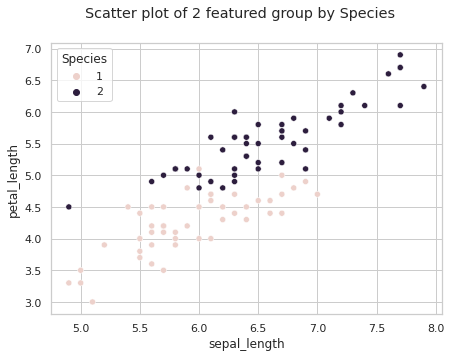

In [90]:
fig, axes = plt.subplots(1, 1, figsize=(7, 5), sharey=True)
fig.suptitle('Scatter plot of 2 featured group by Species')

sns.scatterplot(
        data=iris_practice_data, 
        x=iris_practice_data['sepal_length'],
        y=iris_practice_data['petal_length'], 
        hue='Species',
        ax = axes)

Text(0.5, 1.0, 'petal_length')

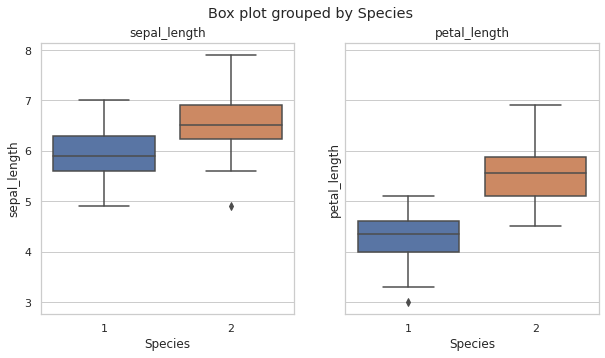

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.suptitle('Box plot grouped by Species')

sns.boxplot(data=iris_practice_data, x='Species', y='sepal_length', ax=axes[0])
axes[0].set_title('sepal_length')

sns.boxplot(data=iris_practice_data, x='Species', y='petal_length', ax=axes[1])
axes[1].set_title('petal_length')

Text(0.5, 1.0, 'petal_length')

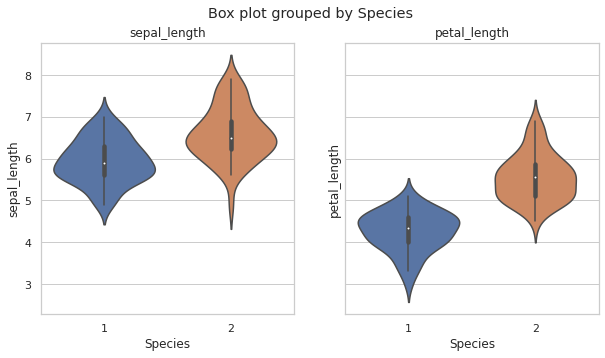

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.suptitle('Box plot grouped by Species')

sns.violinplot(data=iris_practice_data, x='Species', y='sepal_length', ax=axes[0])
axes[0].set_title('sepal_length')

sns.violinplot(data=iris_practice_data, x='Species', y='petal_length', ax=axes[1])
axes[1].set_title('petal_length')

<h3>[Problem 3] Division of preprocessing/training data and verification data</h3>

In [93]:
iris_data_train, iris_data_test = train_test_split(iris_practice_data, test_size=0.25, random_state=50)

display(iris_data_train.shape)
display(iris_data_train)
display(iris_data_test.shape)
display(iris_data_test)

(75, 3)

,sepal_length,petal_length,Species
64,5.6,3.6,1
71,6.1,4.0,1
62,6.0,4.0,1
108,6.7,5.8,2
132,6.4,5.6,2
...,...,...,...
144,6.7,5.7,2
83,6.0,5.1,1
61,5.9,4.2,1
146,6.3,5.0,2


(25, 3)

,sepal_length,petal_length,Species
130,7.4,6.1,2
129,7.2,5.8,2
75,6.6,4.4,1
65,6.7,4.4,1
89,5.5,4.0,1
90,5.5,4.4,1
103,6.3,5.6,2
67,5.8,4.1,1
107,7.3,6.3,2
100,6.3,6.0,2


<h3>[Problem 4] Pretreatment/Standardization</h3>